<a href="https://colab.research.google.com/github/Rashu0304/Pizza-Burn-Detection-Model-Using-ANN-/blob/main/PART_2_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML and DL Exam Paper**
## PART 2 : ANN

# Pizza Image Classification: Burnt vs Fresh Pizza

## Objective:
This project is to develop a machine learning model that can classify pizza images into two categories: "Burnt Pizza" and "Fresh Pizza." The model is trained using a dataset of labeled images, with the goal of predicting the state of a pizza based on visual features. The model leverages neural network architecture to learn from image data, enabling it to make predictions on unseen pizza images.

# Import libraries and packages

In [ ]:

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from imutils import paths
import numpy as np
import random
import pickle
import cv2
import os
import time
import warnings
from tqdm import tqdm

# Filter warnings
warnings.filterwarnings("ignore")
SEED = 42


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Exporting RAR files

In [ ]:
!pip install rarfile
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [ ]:
import rarfile

# Set the path to unrar
rarfile.UNRAR_TOOL = "/usr/bin/unrar"


In [ ]:

import os
import rarfile

train_rar_path = "/content/drive/My Drive/ML & DL Exam/Dataset/train-20241208T164940Z-001.rar"
test_rar_path = "/content/drive/My Drive/ML & DL Exam/Dataset/test-20241208T164940Z-001.rar"

# Extracting both rar files
with rarfile.RarFile(train_rar_path) as rf_train:
    rf_train.extractall("/content/drive/My Drive/ML & DL Exam/Dataset/train")

with rarfile.RarFile(test_rar_path) as rf_test:
    rf_test.extractall("/content/drive/My Drive/ML & DL Exam/Dataset/test")

print("Extraction complete.")



Extraction complete.


# Initialize the data and labels

In [ ]:

print("[INFO] Loading images...")
time1 = time.time()  # to measure time taken
data = []  # x
labels = []  # y
classes = ["burnt_pizza", "fresh_pizza"]

# Grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('/content/drive/My Drive/ML & DL Exam/Dataset/train')))
random.seed(42)
random.shuffle(imagePaths)

# Progress bar
with tqdm(total=len(imagePaths)) as pbar:
    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (128, 128)).flatten()  # Resize and flatten image
        data.append(image)

        label = imagePath.split(os.path.sep)[-2]  # Extract class from folder name
        label = 1 if label == "fresh_pizza" else 0  # Assign label: 0 = burnt_pizza, 1 = fresh_pizza
        labels.append(label)

        pbar.update(1)


# Scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Time taken to load images
print(f'Time taken: {time.time() - time1:.1f} seconds')
print("Image loading complete.")




[INFO] Loading images...


100%|██████████| 709/709 [00:23<00:00, 30.04it/s]


Time taken: 23.9 seconds
Image loading complete.


The imagePaths list holds the paths to all the images in the train directory.
paths.list_images() lists all the images in the given directory (and subdirectories). This will be the source of the dataset.
Sorting and shuffling the paths ensures that the images are not in any specific order, which helps avoid bias when training the model

In [ ]:
print ("Total Images:",len(data))

Total Images: 709


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


In [ ]:
# Print the shape of training and testing data
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (567, 49152)
Testing data shape: (142, 49152)


In [ ]:
# Display a sample image
sample_image = (X_train[42] * 255).astype("uint8")
sample_image = sample_image.reshape(128, 128, 3)

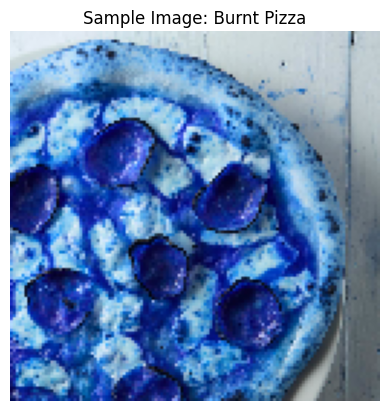

In [ ]:
plt.imshow(sample_image)
plt.title("Sample Image: " + ("Good Pizza" if y_train[42] == 1 else "Burnt Pizza"))
plt.axis('off')
plt.show()

The code selects a sample image from the trainX dataset. Specifically, it selects the image at index 42 from the training set. This image is part of the training data, which was preprocessed
 earlier.

# Define the model

In [ ]:


model = Sequential()
model.add(Dense(units=1024, input_shape=(128 * 128 * 3,), kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=512, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=2, kernel_initializer='uniform', activation='softmax'))


#
# Compile the model

In [ ]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# # Model summary

In [ ]:

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1024)                │      50,332,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,858,498 (194.01 MB)

 Trainable params: 50,858,498 (194.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels,
                                                  test_size=0.2,
                                                  random_state=SEED)

print(f"Training data shape: {trainX.shape}")
print(f"Testing data shape: {testX.shape}")
print(f"Training labels shape: {trainY.shape}")
print(f"Testing labels shape: {testY.shape}")


Training data shape: (567, 49152)
Testing data shape: (142, 49152)
Training labels shape: (567,)
Testing labels shape: (142,)


In [ ]:
# Train the model
EPOCHS = 50
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCHS, batch_size=32, verbose=1)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9124 - loss: 0.1379 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 1.00

During training, the model gradually learns to differentiate between burnt and good pizzas. By monitoring the loss and accuracy curves, we can assess how well the model is converging and whether it might overfit or underperform based on the validation accuracy. If the validation accuracy diverges significantly from the training accuracy, this may indicate overfitting.

# Model Evaluation

In [ ]:
# Evaluate the model on the test set
print("[INFO] Evaluating the model...")
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

 The loss indicates how far off the predictions are from the actual values (lower is better). The accuracy shows how many predictions were correct (higher is better). A test accuracy of 88% suggests the model performs well.

# Visualizing Training Progress

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Making Predictions

In [ ]:
# Making predictions
predictions = model.predict(X_test, batch_size=32)

# Convert predictions to class labels (0 or 1)
predicted_labels = np.argmax(predictions, axis=1)

# Compare predicted labels with actual labels
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("[INFO] Classification report:")
print(classification_report(y_test, predicted_labels))

# Confusion matrix
print("[INFO] Confusion matrix:")
print(confusion_matrix(y_test, predicted_labels))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(testX)
y_pred_classes = np.argmax(y_pred, axis=1)  # For softmax output

cm = confusion_matrix(testY, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Burnt Pizza", "Fresh Pizza"], yticklabels=["Burnt Pizza", "Fresh Pizza"])
plt.title('Confusion Matrix')
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(testX, testY)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


# Save the Mode

In [ ]:
# Save the model
model.save("/content/drive/My Drive/ML & DL Exam/Dataset/pizza_classifier_model.h5")
print("[INFO] Model saved.")


- This project demonstrates the application of image classification techniques in deep learning, where a neural network model successfully differentiates between burnt and fresh pizzas.
- By preprocessing the images, normalizing pixel values, and using a simple dense network architecture, the model is trained to classify pizza images effectively.
- The results highlight the ability of machine learning models to learn and classify visual patterns, which can be extended to more complex image recognition tasks in various domains.